### Opening the dataset

Dataset uploaded on github - https://github.com/Aniket302/Cares_Data/tree/main

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("https://github.com/Aniket302/Cares_Data/blob/main/CARES_data_cleaned.csv?raw=true")
df.head()

,Indexno,Age,Gender,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,...,Anemiacategorybinned_Moderate/Severe,Anemiacategorybinned_NA,RDW15.7_<= 15.7,RDW15.7_>15.7,RDW15.7_NA,ASAcategorybinned_I,ASAcategorybinned_II,ASAcategorybinned_III,ASAcategorybinned_IV-VI,ASAcategorybinned_NA
0,2,48.0,Female,NaN,NaN,NaN,NaN,NaN,False,0.0,...,False,True,False,False,True,True,False,False,False,False
1,5,36.0,Female,NaN,NaN,NaN,NaN,NaN,False,0.0,...,False,True,True,False,False,True,False,False,False,False
2,6,64.0,Female,NaN,Mild,152.538570,G1,NaN,False,0.0,...,False,False,True,False,False,True,False,False,False,False
3,9,73.0,Male,NaN,Moderate,117.231496,G1,NaN,False,0.0,...,True,False,True,False,False,True,False,False,False,False
4,10,73.0,Male,0.0,Mild,98.651255,G1,59.0,False,0.0,...,False,False,False,True,False,False,True,False,False,False


In [ ]:
missing_percentage = df.isnull().mean() * 100

missing_columns = missing_percentage[missing_percentage > 0]
print(missing_columns)

RCRI score                      30.207633
Anemia category                 73.708212
PreopEGFRMDRD                   11.929283
GradeofKidneydisease            11.929283
DaysbetweenDeathandoperation    93.837088
RaceCategory                     0.006609
CVARCRICategory                 31.200088
IHDRCRICategory                 31.472159
CHFRCRICategory                 28.924382
DMinsulinRCRICategory           29.602908
CreatinineRCRICategory          17.340970
GradeofKidneyCategory           11.929283
Anemiacategorybinned            73.708212
RDW15.7                          6.871179
ASAcategorybinned                5.308146
dtype: float64


### Mean imputation for numerical columns

In [ ]:
# Mean imputation for numerical columns - RCRI score and PreopEGFRMDRD
df['RCRI score'].fillna(df['RCRI score'].mean(), inplace = True)
df['PreopEGFRMDRD'].fillna(df['PreopEGFRMDRD'].mean(), inplace = True)

In [ ]:
#Check that there are no more missing values in these two columns:
print(df['RCRI score'].isna().sum())
print(df['PreopEGFRMDRD'].isna().sum())

0
0


### One hot encoding for boolean columns with missing values

In [ ]:
boolean_cols = ['CVARCRICategory', 'IHDRCRICategory','CHFRCRICategory',
                'DMinsulinRCRICategory', 'CreatinineRCRICategory']

Converting boolean to categorical first

In [ ]:
df[boolean_cols] = df[boolean_cols].applymap(lambda x: str(x) if pd.notnull(x) else x)

<ipython-input-10-822e341d1d2a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[boolean_cols] = df[boolean_cols].applymap(lambda x: str(x) if pd.notnull(x) else x)


One hot encoding

In [ ]:
# One-hot encoding
cdf_one_hot = df.copy()

for col in boolean_cols:
    one_hot = pd.get_dummies(df[col], dummy_na=True)
    # retain a column to indicate NaN
    one_hot.columns = one_hot.columns.fillna('NA')
    one_hot.columns = [col + '_' + a for a in one_hot.columns]
    cdf_one_hot = cdf_one_hot.join(one_hot)
cdf_one_hot.head()

,Indexno,Age,Gender,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,...,IHDRCRICategory_NA,CHFRCRICategory_False,CHFRCRICategory_True,CHFRCRICategory_NA,DMinsulinRCRICategory_False,DMinsulinRCRICategory_True,DMinsulinRCRICategory_NA,CreatinineRCRICategory_False,CreatinineRCRICategory_True,CreatinineRCRICategory_NA
0,2,48.0,Female,0.322296,NaN,96.426155,NaN,NaN,False,0.0,...,True,False,False,True,False,False,True,True,False,False
1,5,36.0,Female,0.322296,NaN,96.426155,NaN,NaN,False,0.0,...,True,False,False,True,False,False,True,False,False,True
2,6,64.0,Female,0.322296,Mild,152.538570,G1,NaN,False,0.0,...,True,False,False,True,False,False,True,False,False,True
3,9,73.0,Male,0.322296,Moderate,117.231496,G1,NaN,False,0.0,...,True,False,False,True,False,False,True,True,False,False
4,10,73.0,Male,0.000000,Mild,98.651255,G1,59.0,False,0.0,...,False,True,False,False,True,False,False,True,False,False


87 Columns + 15 (5*3) new one hot encoded columns = 102 columns total

In [ ]:
cdf_one_hot.columns

Index(['Indexno', 'Age', 'Gender', 'RCRI score', 'Anemia category',
       'PreopEGFRMDRD', 'GradeofKidneydisease', 'DaysbetweenDeathandoperation',
       '@30daymortality', 'Preoptransfusionwithin30days',
       ...
       'IHDRCRICategory_NA', 'CHFRCRICategory_False', 'CHFRCRICategory_True',
       'CHFRCRICategory_NA', 'DMinsulinRCRICategory_False',
       'DMinsulinRCRICategory_True', 'DMinsulinRCRICategory_NA',
       'CreatinineRCRICategory_False', 'CreatinineRCRICategory_True',
       'CreatinineRCRICategory_NA'],
      dtype='object', length=102)

In [ ]:
# Save the imputed dataframe as CSV for EDA and further steps
cdf_one_hot.to_csv('CARES_data_imputed.csv', index=False)

#### Raw github link for the imputed dataset:

https://raw.githubusercontent.com/Aniket302/Cares_Data/main/CARES_data_imputed.csv

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

Dropping categorical columns

In [ ]:
# Drop columns that are not necessary
cdf_one_hot.drop(['Indexno'], axis=1, inplace=True)

# Drop columns that are already one-hot encoded
categorical_cols = ['Gender', 'Anemia category', 'GradeofKidneydisease', 'AnaestypeCategory',
                    'PriorityCategory', 'TransfusionIntraandpostopCategory', 'AGEcategory',
                    'AGEcategoryOriginal', 'SurgRiskCategory', 'RaceCategory','GradeofKidneyCategory',
                    'Anemiacategorybinned', 'RDW15.7', 'ASAcategorybinned']

cdf_one_hot.drop(columns = categorical_cols, inplace=True)

boolean_cols = ['CVARCRICategory', 'IHDRCRICategory','CHFRCRICategory',
                'DMinsulinRCRICategory', 'CreatinineRCRICategory']

cdf_one_hot.drop(columns = boolean_cols, inplace=True)

SMOTE resampling function

In [ ]:
# List of outcome variables
outcome_vars = ['DaysbetweenDeathandoperation', '@30daymortality', 'Mortality', 'thirtydaymortality', 'ICUAdmgt24h']

# Separating features and target
X = cdf_one_hot.drop(columns=outcome_vars)

def smote_resample(target_variable):
    y = cdf_one_hot[target_variable]

    # Splitting data into training and testing sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Applying SMOTE to the data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X, y)

    # Original distribution of y
    y_counts = Counter(y)
    y_resampled_counts = Counter(y_train_smote)

    # Check the new distribution
    print(f'Original {target_variable} distribution:\n{y_counts}')
    print(f'\nSMOTE {target_variable} distribution:\n{y_resampled_counts}\n')

    # Create a DataFrame for easy plotting
    df_counts = pd.DataFrame.from_dict(y_counts, orient='index', columns=['Original'])
    df_counts['Resampled'] = pd.Series(y_resampled_counts)

    # Plot the distributions
    ax = df_counts.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Distribution of Original and Resampled \"{target_variable}\"')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

    plt.show()

### **Distribution of target variables before and after SMOTE**

Original @30daymortality distribution:
Counter({False: 90246, True: 539})

SMOTE @30daymortality distribution:
Counter({False: 90246, True: 90246})



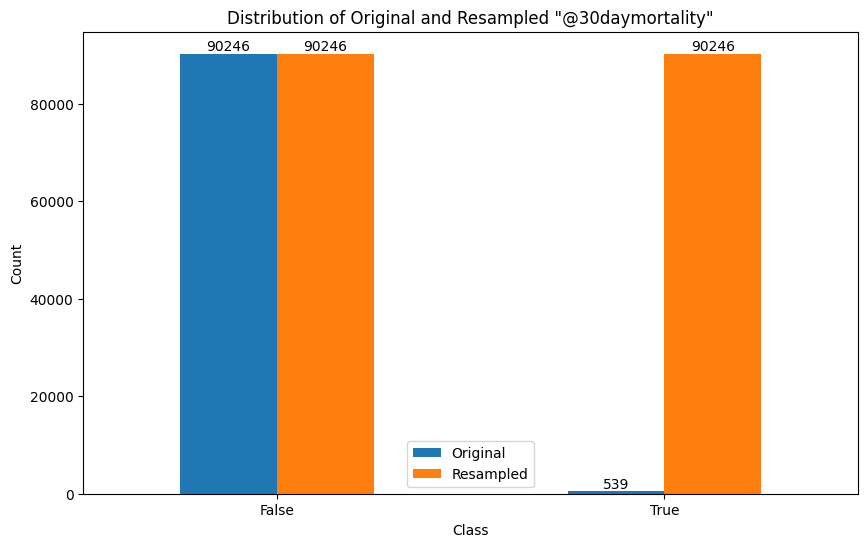

In [ ]:
smote_resample('@30daymortality')

Original Mortality distribution:
Counter({False: 85190, True: 5595})

SMOTE Mortality distribution:
Counter({False: 85190, True: 85190})



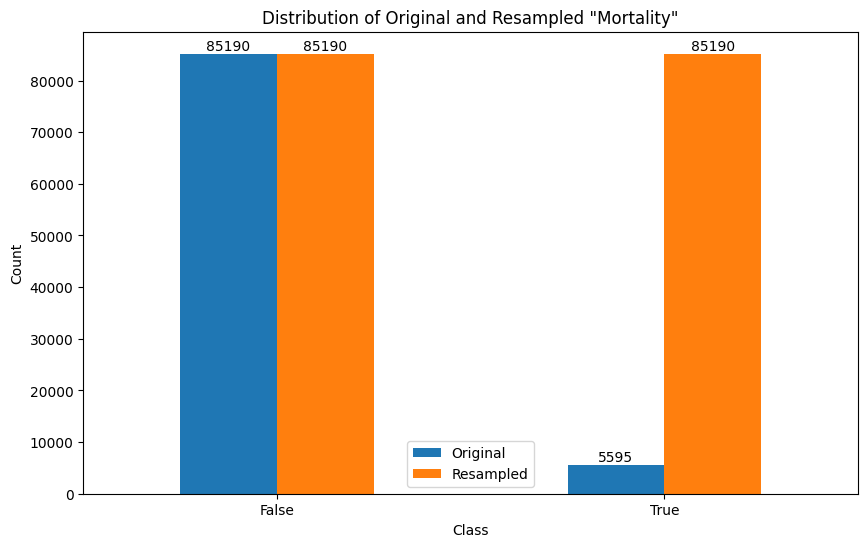

In [ ]:
smote_resample('Mortality')

Original thirtydaymortality distribution:
Counter({False: 90246, True: 539})

SMOTE thirtydaymortality distribution:
Counter({False: 90246, True: 90246})



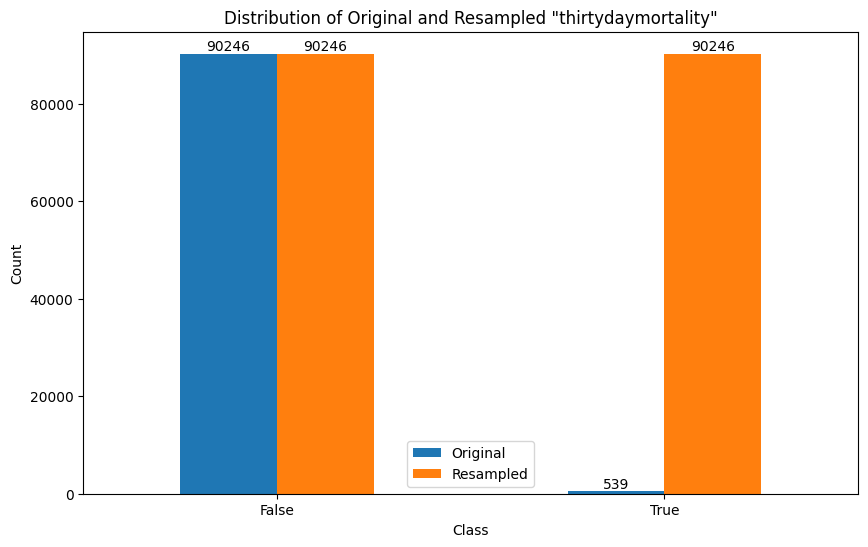

In [ ]:
smote_resample('thirtydaymortality')

Original ICUAdmgt24h distribution:
Counter({False: 89521, True: 1264})

SMOTE ICUAdmgt24h distribution:
Counter({False: 89521, True: 89521})



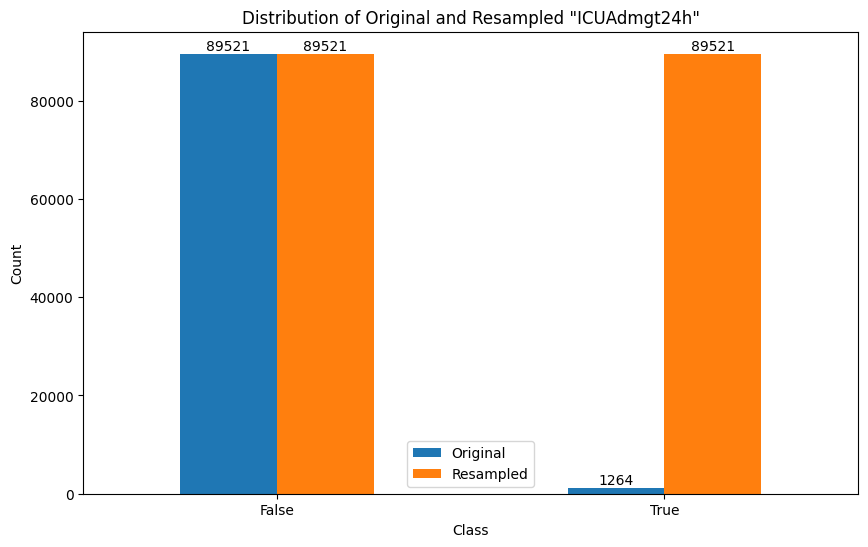

In [ ]:
smote_resample('ICUAdmgt24h')